In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

reviews = pd.read_csv('H_Reviews.csv')['Hospital_Review']
reviews

0     I've been coming to Northwest Hospital for a w...
1     I would like to introduce a hospital, Medstar ...
2     It's a nice place to visit. They have a lot of...
3     Saint Agnes hospital is the best hospital I ha...
4     I had a great experience at the hospital. The ...
                            ...                        
94    I was diagnosed with vertigo by my physician a...
95    John Hopkins Hopsital is the place to go if yo...
96    I've been a patient at Northwest Hospital for ...
97    Medstar Hospital was great. My varicose veins ...
98    I was on my way to a bar mitzvah when I sudden...
Name: Hospital_Review, Length: 99, dtype: object

In [ ]:
htags = pd.read_csv('Hospitals.csv')
htags

,Tags,Hospital_Name
0,NW,Northwest Hospital
1,MS,Medstar Hospital
2,SA,Saint Agnes Hospital
3,SI,Sinai Hospital
4,JH,John Hopkins Hospital


In [ ]:
from transformers import AutoModelForQuestionAnswering, TrainingArguments, Trainer
model = AutoModelForQuestionAnswering.from_pretrained("distilbert-base-uncased")

from transformers import pipeline
question_answering = pipeline("question-answering")
hospitals = []

for i in range(0, len(reviews)):
  question = "Which hospital is the review about?"
  result = question_answering(question=question, context=reviews[i])
  print("Answer:", result['answer'])
  print("Score:", result['score'])
  hospitals.append(result['answer'])

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this mode

Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Answer: Northwest Hospital
Score: 0.8268587589263916
Answer: Medstar
Score: 0.6061062812805176
Answer: They have a lot of good doctors and nurses
Score: 0.3259676992893219
Answer: Saint Agnes hospital
Score: 0.598731517791748
Answer: asthma
Score: 0.7934584021568298
Answer: Sinai hospital
Score: 0.6296178698539734
Answer: Sinai Hospital
Score: 0.8454722166061401
Answer: The nurses
Score: 0.2977138161659241
Answer: John Hopkins hospital
Score: 0.5091830492019653
Answer: Medstar Hospital
Score: 0.9588180184364319
Answer: Northwest Hospital
Score: 0.9768593907356262
Answer: Saint Agnes
Score: 0.5027841925621033
Answer: Sinai hospital
Score: 0.5852102637290955
Answer: John Hopkins
Score: 0.7278797030448914
Answer: Sinai Hospital
Score: 0.9460394978523254
Answer: The staff
Score: 0.13273312151432037
Answer: Northwest hospital
Score: 0.6112679839134216
Answer: Medstar hospital
Score: 0.6224992871284485
Answer: Saint Agnes
Score: 0.5439227223396301
Answer: the hospital
Score: 0.09289867430925

In [ ]:
hospitals

['Northwest Hospital',
 'Medstar',
 'They have a lot of good doctors and nurses',
 'Saint Agnes hospital',
 'asthma',
 'Sinai hospital',
 'Sinai Hospital',
 'The nurses',
 'John Hopkins hospital',
 'Medstar Hospital',
 'Northwest Hospital',
 'Saint Agnes',
 'Sinai hospital',
 'John Hopkins',
 'Sinai Hospital',
 'The staff',
 'Northwest hospital',
 'Medstar hospital',
 'Saint Agnes',
 'the hospital',
 'chronic cholestasis',
 'Sinai',
 'John Hopkins',
 'Northwest hospital',
 'Medstar Hospital',
 'Saint Agnes Hospital',
 'Sinai Hospital',
 'The treatment is on the expensive side but worth it',
 'John Hopkins',
 'Northwest Hospital',
 'Medstar hospital',
 'Saint Agnes',
 'Sinai hospital',
 'John Hopkins',
 'my usual doctor',
 'Northwest hospital',
 'blog post',
 'Medstar',
 'The staff were friendly, my nurses were attentive',
 'Saint Agnes',
 'Sinai hospital',
 'John Hopkins Hospital',
 'Northwest Hospital',
 'Medstar',
 'Saint Agnes',
 'Sinai hospital',
 'John Hopkins Hospital',
 'Medstar

In [ ]:
import nltk, string
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')

stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

from sklearn.feature_extraction.text import TfidfVectorizer

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
tagid = []
for i in range(0, len(hospitals)):
  sims = []
  for j in range(0, len(htags)):
    sims.append(cosine_sim(htags['Hospital_Name'][j], hospitals[i]))
  tagid.append([index for index, item in enumerate(sims) if item == max(sims)])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  % sorted(

In [ ]:
from random import randrange
print()
tags = []
for i in range(0, len(tagid)):
  tags.append(htags.iloc[tagid[i][randrange(len(tagid[i]))]][0])
  #print('sus')

In [ ]:
tags

['NW',
 'MS',
 'SA',
 'SA',
 'SI',
 'SI',
 'SI',
 'NW',
 'JH',
 'MS',
 'NW',
 'SA',
 'SI',
 'JH',
 'SI',
 'MS',
 'NW',
 'MS',
 'SA',
 'NW',
 'SA',
 'SI',
 'JH',
 'NW',
 'MS',
 'SA',
 'SI',
 'NW',
 'JH',
 'NW',
 'MS',
 'SA',
 'SI',
 'JH',
 'SI',
 'NW',
 'SA',
 'MS',
 'SA',
 'SA',
 'SI',
 'JH',
 'NW',
 'MS',
 'SA',
 'SI',
 'JH',
 'MS',
 'SA',
 'SI',
 'JH',
 'NW',
 'MS',
 'SA',
 'SI',
 'SI',
 'JH',
 'NW',
 'MS',
 'SA',
 'SI',
 'JH',
 'NW',
 'MS',
 'SA',
 'SI',
 'JH',
 'NW',
 'MS',
 'MS',
 'SA',
 'SI',
 'NW',
 'JH',
 'SI',
 'NW',
 'MS',
 'SA',
 'SI',
 'NW',
 'JH',
 'NW',
 'MS',
 'SA',
 'SA',
 'SI',
 'SI',
 'JH',
 'JH',
 'SI',
 'NW',
 'MS',
 'SA',
 'SI',
 'SI',
 'JH',
 'NW',
 'MS',
 'SA']

In [ ]:
from collections import Counter

Counter(tags).keys() # equals to list(set(words))
Counter(tags).values()

dict_values([20, 18, 21, 24, 16])

In [ ]:
diseases_df = pd.read_csv('Diseases_Cleaned.csv')
diseases_df

,D_ID,Disease,Symptoms
0,0,Fungal infection,"['dischromic patches', 'nodal skin eruptions',..."
1,1,Allergy,"['shivering', 'watering from eyes', 'chills', ..."
2,2,GERD,"['stomach pain', 'chest pain', 'ulcers on tong..."
3,3,Chronic cholestasis,"['itching', 'vomiting', 'abdominal pain', 'yel..."
4,4,Drug Reaction,"['itching', 'stomach pain', 'skin rash', 'burn..."
5,5,Peptic ulcer diseae,"['indigestion', 'vomiting', 'abdominal pain', ..."
6,6,AIDS,"['patches in throat', 'extra marital contacts'..."
7,7,Diabetes,"['obesity', 'irregular sugar level', 'increase..."
8,8,Gastroenteritis,"['dehydration', 'vomiting', 'sunken eyes', 'di..."
9,9,Bronchial Asthma,"['family history', 'fatigue', 'breathlessness'..."


In [ ]:
from transformers import AutoModelForQuestionAnswering, TrainingArguments, Trainer
model = AutoModelForQuestionAnswering.from_pretrained("distilbert-base-uncased")

from transformers import pipeline
question_answering = pipeline("question-answering")
diseases = []

for i in range(0, len(reviews)):
  question = "Which disease does the patient have?"
  result = question_answering(question=question, context=reviews[i])
  print("Answer:", result['answer'])
  print("Score:", result['score'])
  diseases.append(result['answer'])

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this mode

Answer: AIDS
Score: 0.9986971616744995
Answer: AIDS
Score: 0.99874347448349
Answer: They have a lot of good doctors and nurses
Score: 0.28198933601379395
Answer: AIDS
Score: 0.8745042681694031
Answer: asthma
Score: 0.9972567558288574
Answer: asthma
Score: 0.99692702293396
Answer: heart attack
Score: 0.9703345894813538
Answer: he was dying
Score: 0.032608117908239365
Answer: heart attack
Score: 0.8493762016296387
Answer: hypoglycemia
Score: 0.989210307598114
Answer: diabetic
Score: 0.4171571731567383
Answer: fungus
Score: 0.5882227420806885
Answer: Fungal infection
Score: 0.8361605405807495
Answer: symptoms got worse
Score: 0.04433276876807213
Answer: Sinai Hospital
Score: 0.6179836988449097
Answer: a sudden onset or a more chronic condition
Score: 0.1324407160282135
Answer: GERD
Score: 0.997746467590332
Answer: GERD
Score: 0.9949488639831543
Answer: my particular condition
Score: 0.09517315775156021
Answer: they were really bad
Score: 0.10144855082035065
Answer: chronic cholestasis
Sco

In [ ]:
disid = []
for i in range(0, len(diseases)):
  sims = []
  for j in range(0, len(diseases_df)):
    sims.append(cosine_sim(diseases_df['Disease'][j], diseases[i]))
  disid.append([index for index, item in enumerate(sims) if item == max(sims)])

In [ ]:
from random import randrange
dtags = []
for i in range(0, len(disid)):
  dtags.append(diseases_df.iloc[disid[i][randrange(len(disid[i]))]][1])

In [ ]:
trans_df = pd.DataFrame(list(zip(tags, dtags, reviews)), columns = ['Hospital', 'Disease', 'Reviews'])

In [ ]:
trans_df

,Hospital,Disease,Reviews
0,NW,AIDS,I've been coming to Northwest Hospital for a w...
1,MS,AIDS,"I would like to introduce a hospital, Medstar ..."
2,SA,hepatitis A,It's a nice place to visit. They have a lot of...
3,SA,AIDS,Saint Agnes hospital is the best hospital I ha...
4,SI,Bronchial Asthma,I had a great experience at the hospital. The ...
...,...,...,...
94,SI,(vertigo) Paroymsal Positional Vertigo,I was diagnosed with vertigo by my physician a...
95,JH,Impetigo,John Hopkins Hopsital is the place to go if yo...
96,NW,Impetigo,I've been a patient at Northwest Hospital for ...
97,MS,Varicose veins,Medstar Hospital was great. My varicose veins ...


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# creating object of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
import pandas as pd
# loading csv file.
sentiments = []
for i in range(0, len(trans_df)):
  sid.polarity_scores(trans_df.iloc[i]['Reviews'])
sentiments.append(trans_df['Reviews'].apply(lambda content:sid.polarity_scores(content)))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sentiments = sentiments[0]
sentiments

0     {'neg': 0.057, 'neu': 0.786, 'pos': 0.158, 'co...
1     {'neg': 0.0, 'neu': 0.716, 'pos': 0.284, 'comp...
2     {'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...
3     {'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'comp...
4     {'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'comp...
                            ...                        
94    {'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'comp...
95    {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'comp...
96    {'neg': 0.028, 'neu': 0.709, 'pos': 0.263, 'co...
97    {'neg': 0.063, 'neu': 0.633, 'pos': 0.304, 'co...
98    {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...
Name: Reviews, Length: 99, dtype: object

In [ ]:
sentrat = []
for i in range(0, len(sentiments)):
  sentrat.append(sentiments[i]['pos'] - sentiments[i]['neg'])

sentrat

[0.101,
 0.284,
 0.341,
 0.298,
 0.261,
 0.192,
 -0.03599999999999999,
 -0.035,
 -0.28400000000000003,
 0.026000000000000002,
 0.215,
 0.239,
 -0.02500000000000001,
 -0.192,
 -0.355,
 0.321,
 0.172,
 0.26,
 0.189,
 -0.103,
 0.529,
 -0.032,
 -0.059,
 -0.119,
 0.27799999999999997,
 0.0050000000000000044,
 0.216,
 0.0030000000000000027,
 0.08900000000000001,
 0.328,
 0.269,
 -0.067,
 -0.245,
 0.009000000000000008,
 0.11699999999999999,
 0.173,
 -0.045,
 -0.215,
 0.06599999999999999,
 0.128,
 0.09600000000000002,
 -0.027999999999999983,
 0.301,
 0.264,
 0.395,
 0.151,
 0.395,
 0.023999999999999994,
 0.313,
 -0.106,
 0.221,
 0.335,
 0.058,
 0.19,
 0.034,
 0.11399999999999999,
 0.045999999999999985,
 0.092,
 0.292,
 0.195,
 0.32,
 0.268,
 0.188,
 -0.059,
 -0.083,
 -0.252,
 0.319,
 -0.213,
 -0.168,
 0.06999999999999999,
 0.006999999999999999,
 0.195,
 -0.023999999999999994,
 -0.301,
 -0.171,
 -0.2,
 -0.15000000000000002,
 0.195,
 -0.131,
 -0.178,
 -0.048,
 -0.189,
 -0.26,
 -0.0140000000000000

In [ ]:
trans_df = pd.DataFrame(list(zip(tags, dtags, reviews, sentrat)), columns = ['Hospital', 'Disease', 'Reviews', 'Sentiment Polarity'])
trans_df

,Hospital,Disease,Reviews,Sentiment Polarity
0,NW,AIDS,I've been coming to Northwest Hospital for a w...,0.101
1,MS,AIDS,"I would like to introduce a hospital, Medstar ...",0.284
2,SA,hepatitis A,It's a nice place to visit. They have a lot of...,0.341
3,SA,AIDS,Saint Agnes hospital is the best hospital I ha...,0.298
4,SI,Bronchial Asthma,I had a great experience at the hospital. The ...,0.261
...,...,...,...,...
94,SI,(vertigo) Paroymsal Positional Vertigo,I was diagnosed with vertigo by my physician a...,0.094
95,JH,Impetigo,John Hopkins Hopsital is the place to go if yo...,0.263
96,NW,Impetigo,I've been a patient at Northwest Hospital for ...,0.235
97,MS,Varicose veins,Medstar Hospital was great. My varicose veins ...,0.241


In [ ]:
trans_df.to_csv('Transformed.csv')

In [ ]:
htags

,Tags,Hospital_Name
0,NW,Northwest Hospital
1,MS,Medstar Hospital
2,SA,Saint Agnes Hospital
3,SI,Sinai Hospital
4,JH,John Hopkins Hospital


In [ ]:
Disease = 'Impetigo'


rslt_df = trans_df[trans_df['Disease'] == Disease]
rslt_df = rslt_df.groupby(['Hospital'])['Sentiment Polarity'].mean().reset_index()

rh = rslt_df[rslt_df['Sentiment Polarity'] == max(rslt_df['Sentiment Polarity'])]['Hospital'].reset_index(drop=True)

print(htags[htags['Tags'] == rh[0]]['Hospital_Name'].reset_index(drop=True)[0])

John Hopkins Hospital


In [ ]:
sent = "Which hospital would you recommend me, which hospital should i go, which hospital is best for this disease, where should i go, which doctor do you suggest, which hospital would treat this, what to do now"

ask = 'suggest me a hospital'

cosine_sim(sent, ask)

0.5995187500758431

In [ ]:
trans_df

,Hospital,Disease,Reviews,Sentiment Polarity
0,NW,AIDS,I've been coming to Northwest Hospital for a w...,0.101
1,MS,AIDS,"I would like to introduce a hospital, Medstar ...",0.284
2,SA,hepatitis A,It's a nice place to visit. They have a lot of...,0.341
3,SA,AIDS,Saint Agnes hospital is the best hospital I ha...,0.298
4,SI,Bronchial Asthma,I had a great experience at the hospital. The ...,0.261
...,...,...,...,...
94,SI,(vertigo) Paroymsal Positional Vertigo,I was diagnosed with vertigo by my physician a...,0.094
95,JH,Impetigo,John Hopkins Hopsital is the place to go if yo...,0.263
96,NW,Impetigo,I've been a patient at Northwest Hospital for ...,0.235
97,MS,Varicose veins,Medstar Hospital was great. My varicose veins ...,0.241


In [ ]:
rslt_df = trans_df.groupby(['Hospital','Disease'])['Sentiment Polarity'].mean().reset_index()
rslt_df

,Hospital,Disease,Sentiment Polarity
0,JH,Acne,0.3190
1,JH,Allergy,-0.0480
2,JH,Arthritis,0.2210
3,JH,Chronic cholestasis,0.1045
4,JH,Diabetes,0.0890
...,...,...,...
76,SI,Hypoglycemia,0.3200
77,SI,Impetigo,0.1950
78,SI,Jaundice,0.0275
79,SI,Migraine,0.1155


In [ ]:
g1df = rslt_df.groupby(['Hospital'])['Sentiment Polarity'].mean().reset_index()
g1df

,Hospital,Sentiment Polarity
0,JH,0.034607
1,MS,0.104059
2,NW,0.038490
3,SA,0.127083
4,SI,0.016646


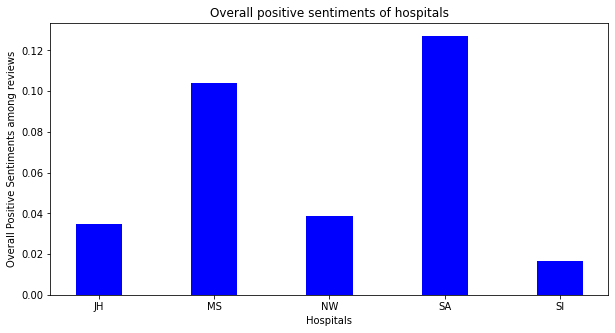

In [ ]:
import matplotlib.pyplot as plt
 
courses = g1df['Hospital'].to_list()
values = g1df['Sentiment Polarity'].to_list()
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Hospitals")
plt.ylabel("Overall Positive Sentiments among reviews")
plt.title("Overall positive sentiments of hospitals")
plt.show()

In [ ]:
g2df = rslt_df[rslt_df['Hospital']=='SA'].groupby(['Disease'])['Sentiment Polarity'].mean().reset_index()
g2df

,Disease,Sentiment Polarity
0,AIDS,0.1515
1,Allergy,0.3130
2,Arthritis,-0.0830
3,Bronchial Asthma,-0.0670
4,Chronic cholestasis,0.5290
5,Dengue,0.2010
6,Diabetes,0.2390
7,Fungal infection,-0.0450
8,Gastroenteritis,0.1900
9,Heart attack,0.2330


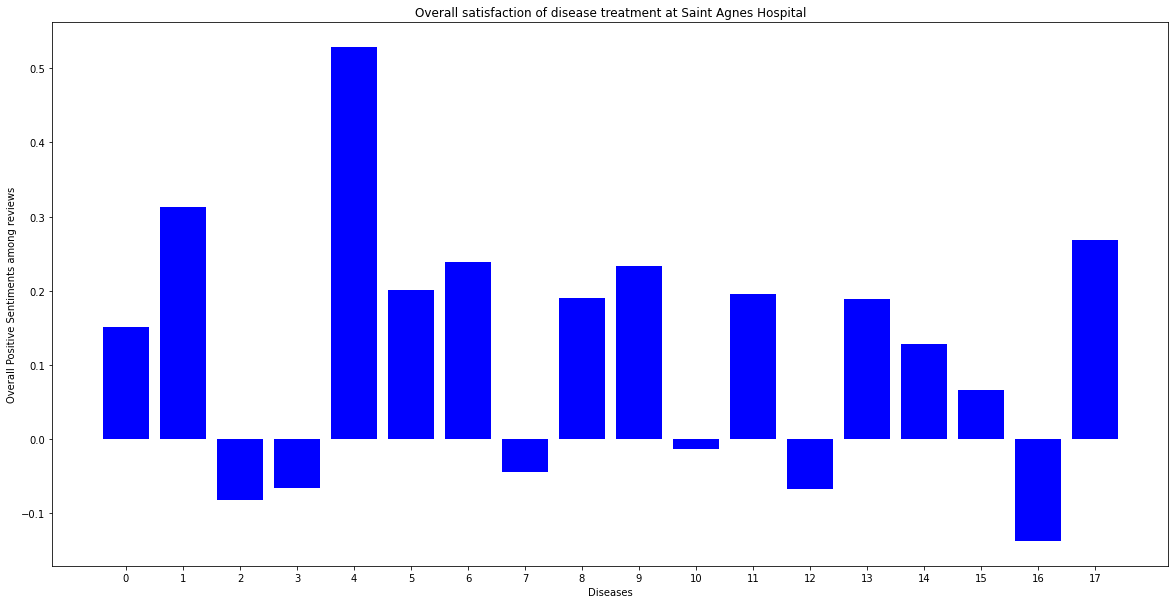

In [ ]:
import matplotlib.pyplot as plt
 
courses = [0, 1, 2, 3, 4, 5, 6, 7, 8 , 9, 10, 11, 12, 13, 14, 15, 16, 17]
values = g2df['Sentiment Polarity'].to_list()
  
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(courses, values, color ='blue')
 
plt.xticks(courses)
plt.xlabel("Diseases")
plt.ylabel("Overall Positive Sentiments among reviews")
plt.title("Overall satisfaction of disease treatment at Saint Agnes Hospital")
plt.show()

In [ ]:
g3df = rslt_df[rslt_df['Hospital']=='SI'].groupby(['Disease'])['Sentiment Polarity'].mean().reset_index()
g3df

,Disease,Sentiment Polarity
0,(vertigo) Paroymsal Positional Vertigo,-0.020000
1,AIDS,0.216000
2,Bronchial Asthma,0.069333
3,Cervical spondylosis,-0.171000
4,Chronic cholestasis,0.001000
5,Fungal infection,-0.025000
6,Gastroenteritis,-0.355000
7,Heart attack,0.053000
8,Hepatitis D,-0.106000
9,Hepatitis E,-0.131000


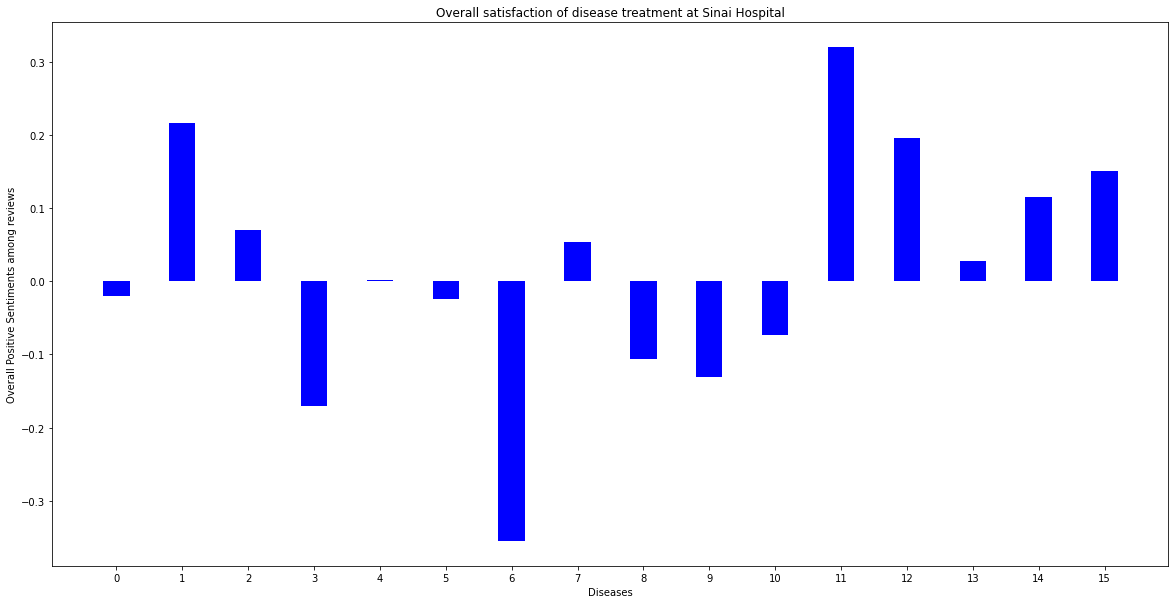

In [ ]:
import matplotlib.pyplot as plt
 
courses = [0, 1, 2, 3, 4, 5, 6, 7, 8 , 9, 10, 11, 12, 13, 14, 15]
values = g3df['Sentiment Polarity'].to_list()
  
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(courses, values, color ='blue', width = 0.4)
 
plt.xticks(courses)
plt.xlabel("Diseases")
plt.ylabel("Overall Positive Sentiments among reviews")
plt.title("Overall satisfaction of disease treatment at Sinai Hospital")
plt.show()

In [ ]:
g4df = rslt_df[rslt_df['Disease']=='Heart attack'].groupby(['Hospital'])['Sentiment Polarity'].mean().reset_index()
g4df

,Hospital,Sentiment Polarity
0,JH,-0.119
1,MS,0.133
2,SA,0.233
3,SI,0.053


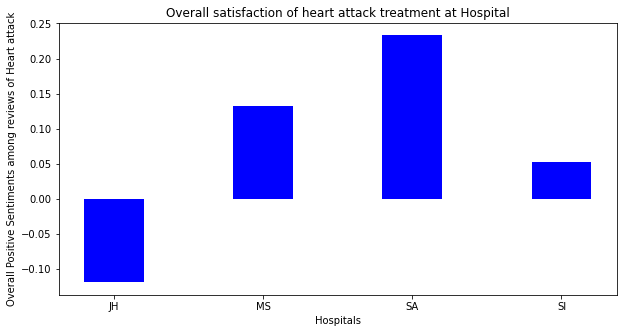

In [ ]:
import matplotlib.pyplot as plt
 
courses = g4df['Hospital'].to_list()
values = g4df['Sentiment Polarity'].to_list()
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue', width = 0.4)
 
plt.xticks(courses)
plt.xlabel("Hospitals")
plt.ylabel("Overall Positive Sentiments among reviews of Heart attack")
plt.title("Overall satisfaction of heart attack treatment at Hospital")
plt.show()